In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from PIL import Image
import json
import cv2

In [2]:
IMAGES_PATH = {
    'train': 'images/train/',
    'val': 'images/val/',
    'test': 'images/test/'}
ANNO_PATH = {
    'train': 'annotations/deepfashion2_train.json',
    'val': 'annotations/deepfashion2_val.json'}

In [3]:
with open(ANNO_PATH['val']) as f:
      data = json.load(f)
        
print(data.keys())

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [4]:
img_dict = list(data['images'])
anno = list(data['annotations'])
anno_dict = {}
for x in anno:
    idx = x["image_id"]
    if idx not in anno_dict.keys():
        anno_dict[idx] = []
    anno_dict[idx].append(x["segmentation"])
print(len(anno_dict))

32153


In [5]:
def create_mask(img,segs):
    canvas = np.ones((img.size[1], img.size[0],3), np.uint8)
    canvas*=255
    for seg in segs:
        color = list(np.random.random(size=3) * 255)
        for item in seg:
            px = np.array(item).reshape((-1,2))
            points = [(int(x[0]),int(x[1])) for x in px]
            pts = np.array([[x,y] for(x,y) in points])
            cv2.drawContours(canvas, [pts],-1, color, -1)  
    mask = Image.fromarray(canvas)
    return mask

In [6]:
def make_transparent(img):
    img.putalpha(128)
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    return img

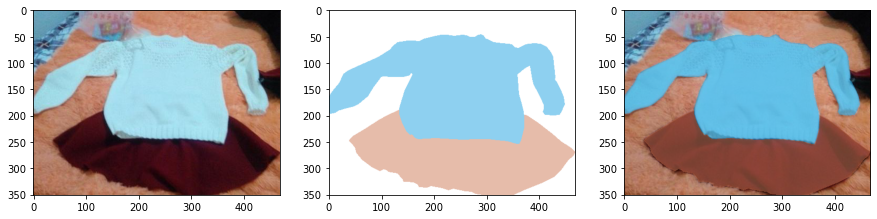

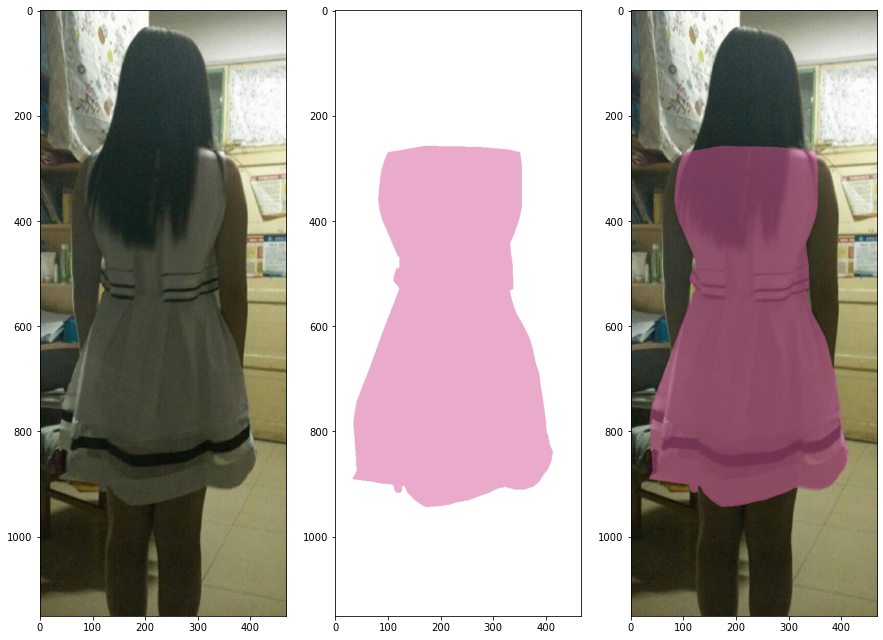

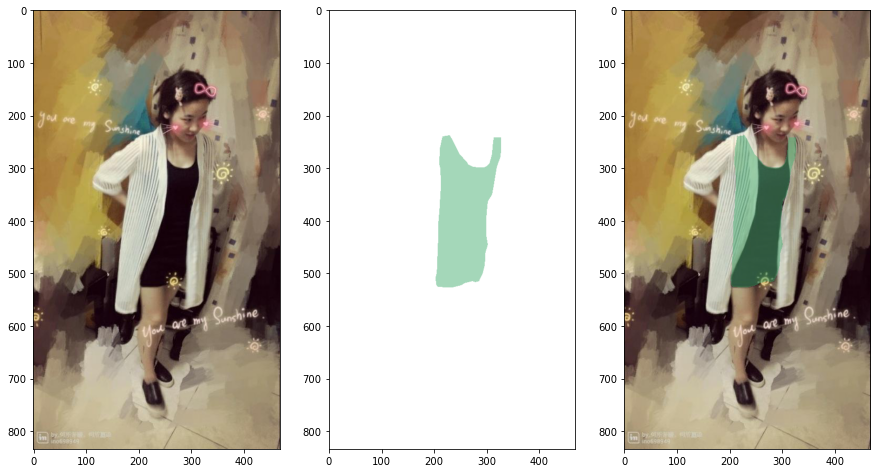

In [7]:
def visualize_img(NUM_IMG = 3):
    for i in range(NUM_IMG):
        a = np.random.randint(2,10000)

        img_name = img_dict[a-1]["file_name"]
        img = Image.open(IMAGES_PATH['val'] + img_name)
        segs = anno_dict[a]
        mask = create_mask(img,segs)

        img1 = img.copy()
        transparent = make_transparent(mask)
        img1.paste(transparent, (0, 0), transparent)

        plt.figure(figsize=(15,15))
        plt.subplot(1,3,1)
        plt.imshow(img)
        plt.subplot(1,3,2)
        plt.imshow(mask)
        plt.subplot(1,3,3)
        plt.imshow(img1)
        plt.show()

visualize_img(3)